# EE 511 Assignment 3 - PartII
University of Washington<br>
Code by John Ragland and Doruk Arisoy<br>
Winter 2021

In [1]:
# Suppress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
from tools import Data
from collections import Counter
import time
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Processing the data

In [2]:
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

In [4]:
# Takes ~4 minutes
start = time.time()
data = Data(categories)
print(time.time() - start)

Calculating Vocabulary...
Loading Testing Data...
Loading Training Data...
Normalizing training Data...
Splitting Training Data into Training and Validation...
528.3758108615875


In [6]:
print('Top 10 words in the vocab: %s' % (', '.join(map(str, data.vocab[:10]))))

Top 10 words in the vocab: the, to, of, a, and, i, in, is, that, it


## Comparing Data Representation Methods with Logistic Regression

In [13]:
model_bin = LogisticRegression()
model_bin.fit(data.train_bin, data.train_bin_labels)
bin_acc = 100.0 * model_bin.score(data.valid_bin, data.valid_bin_labels)
print('Binary input representation accuracy:  %.2f%%' % bin_acc)

Binary input representation accuracy:  88.67%


In [14]:
model_max = LogisticRegression()
model_max.fit(data.train_max, data.train_max_labels)
max_acc = 100.0 * model_max.score(data.valid_max, data.valid_max_labels)
print('Max input representation accuracy: %.2f%%' % max_acc)

Max input representation accuracy: 84.07%


In [16]:
model_log = LogisticRegression()
model_log.fit(data.train_log, data.train_log_labels)
log_acc = 100.0 * model_log.score(data.valid_log, data.valid_log_labels)
print('Log input representation accuracy: %.2f%%' % log_acc)

Log input representation accuracy: 89.03%


In [7]:
best_max_iter = 0
best_iter_acc = 0
for i in range(10):
    max_iter = 100+(100*i)
    model = LogisticRegression(max_iter=max_iter)
    model.fit(data.train_log, data.train_log_labels)
    acc = 100.0 * model.score(data.valid_log, data.valid_log_labels)
    print('max_iter: %d, accuracy: %.2f%%' % (max_iter, acc))
    if acc > best_iter_acc:
        best_iter_acc = acc
        best_max_iter = max_iter
print('Best max_iter: %d, best accuracy: %.2f%%' % (best_max_iter, best_iter_acc))

max_iter: 100, accuracy: 85.66%
max_iter: 200, accuracy: 85.84%
max_iter: 300, accuracy: 85.93%
max_iter: 400, accuracy: 85.75%
max_iter: 500, accuracy: 85.75%
max_iter: 600, accuracy: 85.75%
max_iter: 700, accuracy: 85.75%


KeyboardInterrupt: 

## Evaluate the best model

In [ ]:
best_model = LogisticRegression(max_iter=best_max_iter)
best_model.fit(data.train_log, data.train_log_labels)

In [138]:
best_acc = 100.0 * best_model.score(data.test_log, data.test_labels)
print('Best model accuracy: %.2f%%' % best_acc)

Best model accuracy: 76.69%


In [132]:
pred = best_model.predict(data.test_log)
confusion = metrics.confusion_matrix(data.test_labels, pred)

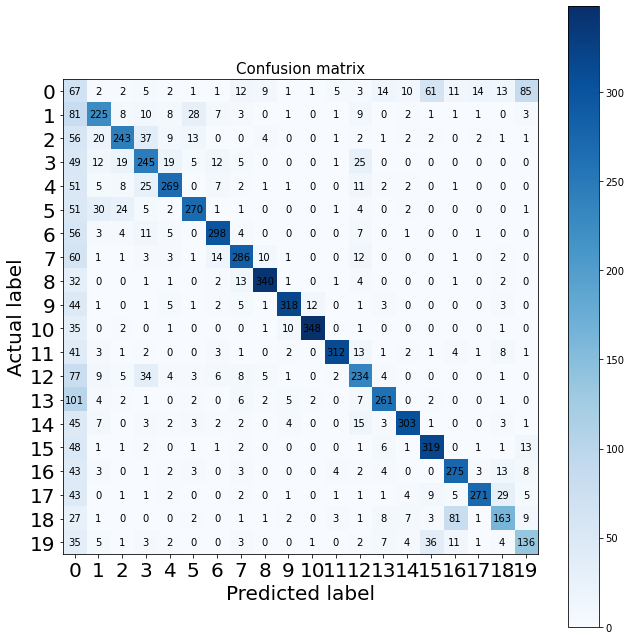

In [134]:
plt.figure(figsize=(9,9))
plt.imshow(confusion, interpolation='nearest', cmap='Blues')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(20)
plt.xticks(tick_marks, range(20), size = 20)
plt.yticks(tick_marks, range(20), size = 20)
plt.tight_layout()
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
width, height = confusion.shape
for x in range(width):
 for y in range(height):
  plt.annotate(confusion[x][y], xy=(y, x), horizontalalignment='center', verticalalignment='center')

In [139]:
misses = np.array([sum(line) - line[cat] for cat, line in enumerate(cm)])
top_five = [categories[cat] for cat in misses.argsort()[-5::]]

# electronics, MS windows, computer graphics and PC hardware are very similar topics
# so it is understandable that the model confuses those 4 the most
print('Top 5 misclassified labels from worst to best: %s' % top_five)

Top 5 misclassified labels from worst to best: ['sci.electronics', 'comp.os.ms-windows.misc', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'talk.politics.misc']


## Model Inspection of the best model

In [146]:
for cat, features in enumerate(best_model.coef_):
    top_ten = [data.vocab[word] for word in features.argsort()[-10::]]
    bottom_ten = [data.vocab[word] for word in features.argsort()[:10]]
    print('Highest features for %s: %s' % (categories[cat], ', '.join(map(str, top_ten))))
    print('Lowest features for %s: %s' % (categories[cat], ', '.join(map(str, bottom_ten))))
    print()

Highest features for alt.atheism: bill, atheism, benedikt, umd, thoughts, mathew, believing, keith, atheists, bible
Lowest features for alt.atheism: thanks, mail, christians, strength, about, interested, kevin, wanted, rutgers, test

Highest features for comp.graphics: surface, pov, images, library, tiff, image, send, michael, sorry, graphics
Lowest features for comp.graphics: re, l, nec, monitor, microsoft, memory, school, disks, mailing, dpi

Highest features for comp.os.ms-windows.misc: drivers, microsoft, cica, file, driver, tommy, nt, ring, win, windows
Lowest features for comp.os.ms-windows.misc: x, of, and, copy, request, board, currently, bit, appreciate, packages

Highest features for comp.sys.ibm.pc.hardware: au, pc, rom, docs, card, wow, cpu, later, robert, zip
Lowest features for comp.sys.ibm.pc.hardware: with, mac, re, shipping, latest, o, win, anyone, mail, windows

Highest features for comp.sys.mac.hardware: art, lc, macs, modem, centris, duo, quadra, apple, mac, th
Lowe

# TODO List
- code TODO:
    + \[step d\] add hyperparameters? and find best model
    + \[step b\] \[kind of optional\] implement the more complex vocabulary
- report TODO:
    + why we picked logistic
    + \[step b \] table of top 10 words
    + \[step b\] mutual information of the top 10 words?? what is mutual information? the fact that they are all filler words??
    + \[step d\] why we picked log representation, why we picked the validation we did, why we picked hyperparameters
    + \[step e\] Comment on whether the top 5 misclassified labels make sense given the topics.
    + \[step f\] Compare the results to what you found using mutual information.